In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load datasets
traffic_df = pd.read_csv('Traffic.csv')
traffic_two_month_df = pd.read_csv('TrafficTwoMonth.csv')

In [ ]:
traffic_df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,1669
heavy,682
high,321
low,304


In [ ]:
# Combine datasets
traffic_df['Source'] = 'OneMonth'
traffic_two_month_df['Source'] = 'TwoMonth'
combined_df = pd.concat([traffic_df, traffic_two_month_df], ignore_index=True)

In [ ]:
# 1. Distribution of vehicle counts for cars, bikes, buses, and trucks
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts", "Bike Counts", "Bus Counts", "Truck Counts"))

fig.add_trace(go.Histogram(x=combined_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Histogram(x=combined_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Histogram(x=combined_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Histogram(x=combined_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Distribution of Vehicle Counts', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Count")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [ ]:
# 3. Distribution of traffic situations
import plotly.express as px
fig = px.pie(combined_df, names='Traffic Situation', title='Traffic Situation Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Traffic Situation Distribution', title_x=0.5, template='plotly_white')
fig.show()

In [ ]:
# 4. Vehicle count vary by day of the week
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Day", "Bike Counts by Day", "Bus Counts by Day", "Truck Counts by Day"))

fig.add_trace(go.Box(x=combined_df['Day of the week'], y=combined_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=combined_df['Day of the week'], y=combined_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=combined_df['Day of the week'], y=combined_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=combined_df['Day of the week'], y=combined_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Day of the Week', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Day of the Week")
fig.update_yaxes(title_text="Count")
fig.show()

In [ ]:
# 5-8. Relationship between vehicle counts and traffic situation
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Traffic Situation", "Bike Counts by Traffic Situation", "Bus Counts by Traffic Situation", "Truck Counts by Traffic Situation"))

fig.add_trace(go.Box(x=combined_df['Traffic Situation'], y=combined_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=combined_df['Traffic Situation'], y=combined_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=combined_df['Traffic Situation'], y=combined_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=combined_df['Traffic Situation'], y=combined_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Traffic Situation', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Traffic Situation")
fig.update_yaxes(title_text="Count")
fig.show()

In [ ]:
# 9. Total vehicle count by traffic situation
fig = px.box(combined_df, x='Traffic Situation', y='Total', title='Total Vehicle Count by Traffic Situation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Total Vehicle Count by Traffic Situation', title_x=0.5, xaxis_title='Traffic Situation', yaxis_title='Total Count', template='plotly_white')
fig.show()

In [ ]:
# 10. Vehicle count vary by source
fig = make_subplots(rows=2, cols=2, subplot_titles=("Car Counts by Source", "Bike Counts by Source", "Bus Counts by Source", "Truck Counts by Source"))

fig.add_trace(go.Box(x=combined_df['Source'], y=combined_df['CarCount'], name='Car Counts', marker_color='#1f77b4'), row=1, col=1)
fig.add_trace(go.Box(x=combined_df['Source'], y=combined_df['BikeCount'], name='Bike Counts', marker_color='#ff7f0e'), row=1, col=2)
fig.add_trace(go.Box(x=combined_df['Source'], y=combined_df['BusCount'], name='Bus Counts', marker_color='#2ca02c'), row=2, col=1)
fig.add_trace(go.Box(x=combined_df['Source'], y=combined_df['TruckCount'], name='Truck Counts', marker_color='#d62728'), row=2, col=2)

fig.update_layout(title_text='Vehicle Counts by Source', title_x=0.5, showlegend=False, template='plotly_white')
fig.update_xaxes(title_text="Source")
fig.update_yaxes(title_text="Count")
fig.show()

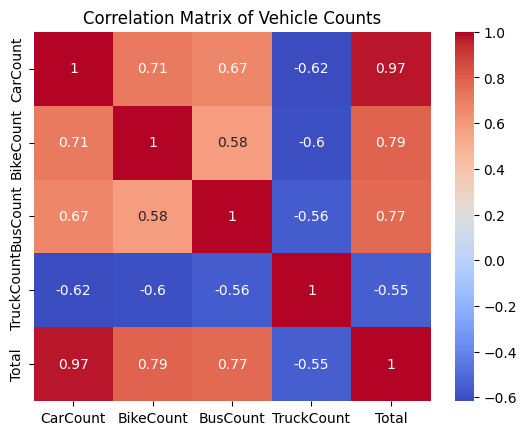

In [ ]:
# Correlations between different vehicle types
corr_matrix = combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vehicle Counts')
plt.show()

In [ ]:
# Identify and remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

vehicle_counts = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
combined_df = remove_outliers(combined_df, vehicle_counts)

In [ ]:
# Check for missing values and duplicates
print("Missing values in each column:")
print(combined_df.isnull().sum())

print(f"Number of duplicate rows: {combined_df.duplicated().sum()}")

Missing values in each column:
Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
Source               0
dtype: int64
Number of duplicate rows: 0


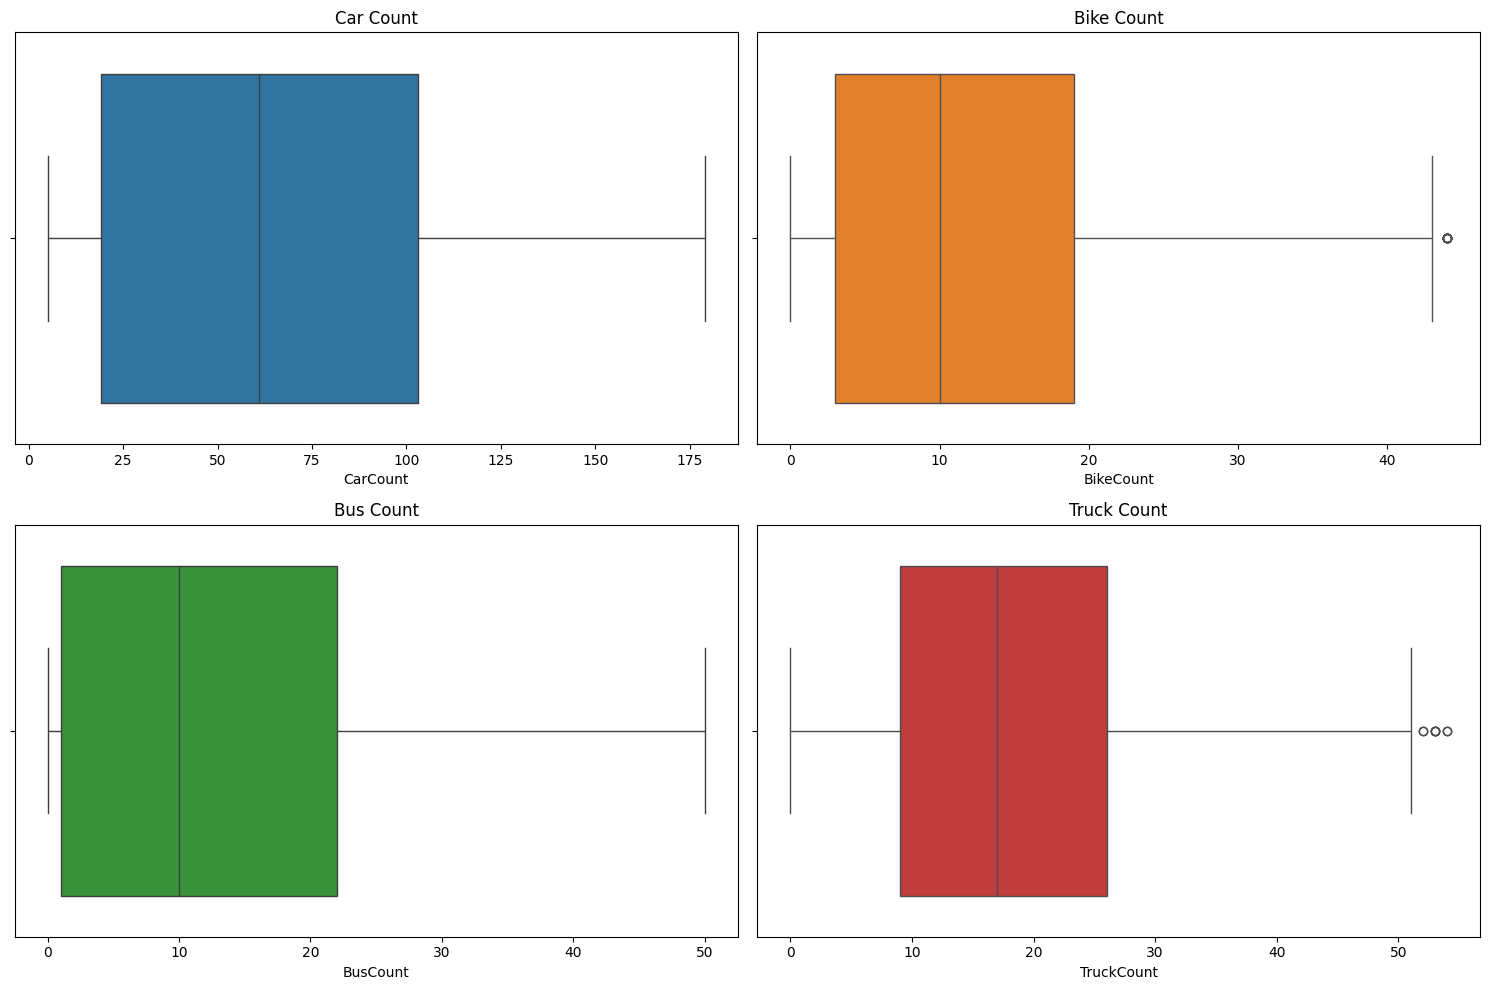

In [ ]:
# Plot boxplots to visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=combined_df, x='CarCount', ax=axes[0, 0], color='#1f77b4')
sns.boxplot(data=combined_df, x='BikeCount', ax=axes[0, 1], color='#ff7f0e')
sns.boxplot(data=combined_df, x='BusCount', ax=axes[1, 0], color='#2ca02c')
sns.boxplot(data=combined_df, x='TruckCount', ax=axes[1, 1], color='#d62728')
axes[0, 0].set_title('Car Count')
axes[0, 1].set_title('Bike Count')
axes[1, 0].set_title('Bus Count')
axes[1, 1].set_title('Truck Count')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, LabelEncoder
# Check normality for each vehicle count before normalization
def check_normality(data):
    stat, p = shapiro(data)
    return p > 0.05

print("Normality check before normalization:")
car_normal = check_normality(combined_df['CarCount'])
bike_normal = check_normality(combined_df['BikeCount'])
bus_normal = check_normality(combined_df['BusCount'])
truck_normal = check_normality(combined_df['TruckCount'])

print(f"Car count normality: {car_normal}")
print(f"Bike count normality: {bike_normal}")
print(f"Bus count normality: {bus_normal}")
print(f"Truck count normality: {truck_normal}")

Normality check before normalization:
Car count normality: False
Bike count normality: False
Bus count normality: False
Truck count normality: False


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8720.



In [ ]:
# Normalize data using QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']] = scaler.fit_transform(combined_df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])

# Check normality for each vehicle count after normalization
print("Normality check after normalization:")
car_normal = check_normality(combined_df['CarCount'])
bike_normal = check_normality(combined_df['BikeCount'])
bus_normal = check_normality(combined_df['BusCount'])
truck_normal = check_normality(combined_df['TruckCount'])

print(f"Car count normality: {car_normal}")
print(f"Bike count normality: {bike_normal}")
print(f"Bus count normality: {bus_normal}")
print(f"Truck count normality: {truck_normal}")

Normality check after normalization:
Car count normality: False
Bike count normality: False
Bus count normality: False
Truck count normality: False


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8720.



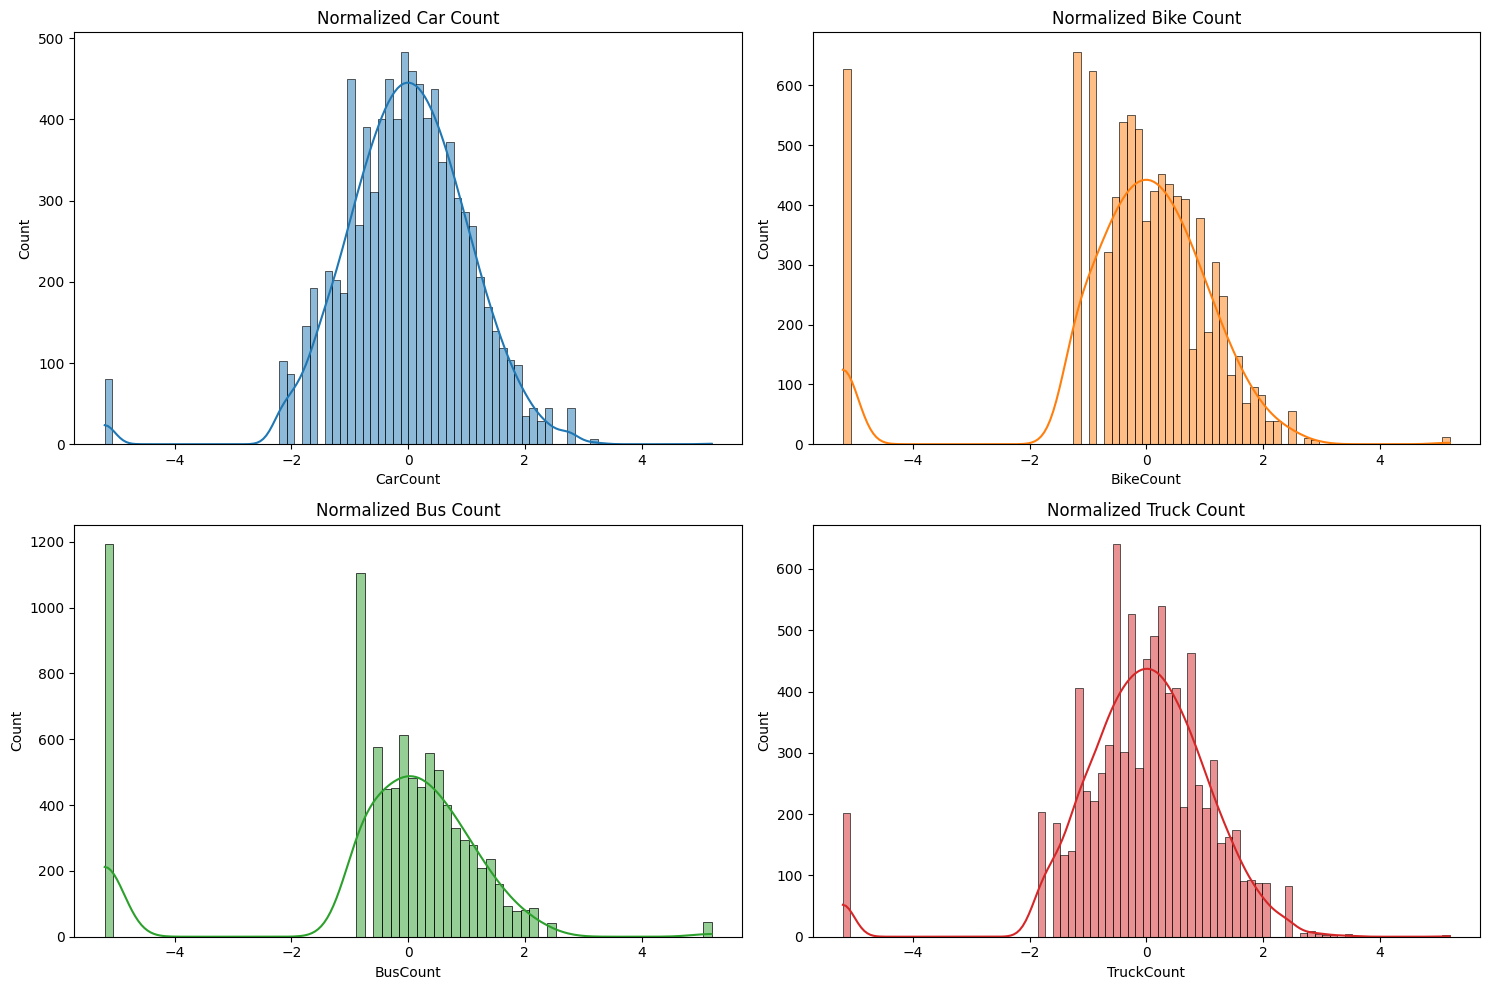

In [ ]:
# Check distribution after normalization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(combined_df['CarCount'], ax=axes[0, 0], kde=True, color='#1f77b4')
sns.histplot(combined_df['BikeCount'], ax=axes[0, 1], kde=True, color='#ff7f0e')
sns.histplot(combined_df['BusCount'], ax=axes[1, 0], kde=True, color='#2ca02c')
sns.histplot(combined_df['TruckCount'], ax=axes[1, 1], kde=True, color='#d62728')
axes[0, 0].set_title('Normalized Car Count')
axes[0, 1].set_title('Normalized Bike Count')
axes[1, 0].set_title('Normalized Bus Count')
axes[1, 1].set_title('Normalized Truck Count')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare the features and target
X = combined_df.drop(columns=['Traffic Situation'])
y = combined_df['Traffic Situation']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing pipeline for numeric and categorical features
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Hour']
categorical_features = ['Time', 'Date', 'Day of the week', 'Source', 'Weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
print(combined_df.columns)


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'Source'],
      dtype='object')


In [ ]:
# Assuming 'Time' is a string or datetime type column
combined_df['Hour'] = pd.to_datetime(combined_df['Time']).dt.hour


<ipython-input-23-bfd62c5b6333>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']


In [ ]:
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']


In [ ]:
# Prepare the features and target
X = combined_df.drop(columns=['Traffic Situation'])
y = combined_df['Traffic Situation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical features
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
categorical_features = ['Time', 'Date', 'Day of the week', 'Source']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define a dictionary of classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Function to evaluate a classifier
def evaluate_classifier(classifier, X_train, X_test, y_train, y_test, preprocessor):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model with multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    try:
        roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')  # For multi-class classification
    except:
        roc_auc = 'N/A'  # In case the algorithm doesn't support predicting probabilities (e.g., SVM without probability=True)

    print(f"\n{classifier.__class__.__name__} Model Performance:")
    print(f"Model accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    print(f"ROC AUC Score: {roc_auc}")

# Evaluate each classifier
for name, clf in classifiers.items():
    evaluate_classifier(clf, X_train, X_test, y_train, y_test, preprocessor)



RandomForestClassifier Model Performance:
Model accuracy: 0.99

Confusion Matrix:
[[ 333    0    0    0]
 [   0  122    0    0]
 [   0    0  230    8]
 [   2    3    0 1046]]

Classification Report:
              precision    recall  f1-score   support

       heavy       0.99      1.00      1.00       333
        high       0.98      1.00      0.99       122
         low       1.00      0.97      0.98       238
      normal       0.99      1.00      0.99      1051

    accuracy                           0.99      1744
   macro avg       0.99      0.99      0.99      1744
weighted avg       0.99      0.99      0.99      1744

ROC AUC Score: 0.9993652758780449


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




LogisticRegression Model Performance:
Model accuracy: 0.86

Confusion Matrix:
[[323   5   0   5]
 [  6  64   1  51]
 [  0   0 142  96]
 [ 10  26  49 966]]

Classification Report:
              precision    recall  f1-score   support

       heavy       0.95      0.97      0.96       333
        high       0.67      0.52      0.59       122
         low       0.74      0.60      0.66       238
      normal       0.86      0.92      0.89      1051

    accuracy                           0.86      1744
   macro avg       0.81      0.75      0.78      1744
weighted avg       0.85      0.86      0.85      1744

ROC AUC Score: 0.9586639315265979

SVC Model Performance:
Model accuracy: 0.92

Confusion Matrix:
[[ 327    3    0    3]
 [   4   86    0   32]
 [   0    0  190   48]
 [  17   13   13 1008]]

Classification Report:
              precision    recall  f1-score   support

       heavy       0.94      0.98      0.96       333
        high       0.84      0.70      0.77       122
       

In [ ]:
import pandas as pd

# Model performance data
models = ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'GradientBoostingClassifier']
accuracy = [0.99, 0.86, 0.92, 1.00]
roc_auc = [0.9994, 0.9587, None, 0.9999]
precision_macro = [0.99, 0.81, 0.91, 1.00]
recall_macro = [0.99, 0.75, 0.86, 1.00]
f1_macro = [0.99, 0.78, 0.88, 1.00]
precision_weighted = [0.99, 0.85, 0.92, 1.00]
recall_weighted = [0.99, 0.86, 0.92, 1.00]
f1_weighted = [0.99, 0.85, 0.92, 1.00]

# Create a DataFrame for the comparative table
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'ROC AUC Score': roc_auc,
    'Precision (macro avg)': precision_macro,
    'Recall (macro avg)': recall_macro,
    'F1-Score (macro avg)': f1_macro,
    'Precision (weighted avg)': precision_weighted,
    'Recall (weighted avg)': recall_weighted,
    'F1-Score (weighted avg)': f1_weighted
})

# Display the comparative result table
print(results_df)


                        Model  Accuracy  ROC AUC Score  Precision (macro avg)  \
0      RandomForestClassifier      0.99         0.9994                   0.99   
1          LogisticRegression      0.86         0.9587                   0.81   
2                         SVC      0.92            NaN                   0.91   
3  GradientBoostingClassifier      1.00         0.9999                   1.00   

   Recall (macro avg)  F1-Score (macro avg)  Precision (weighted avg)  \
0                0.99                  0.99                      0.99   
1                0.75                  0.78                      0.85   
2                0.86                  0.88                      0.92   
3                1.00                  1.00                      1.00   

   Recall (weighted avg)  F1-Score (weighted avg)  
0                   0.99                     0.99  
1                   0.86                     0.85  
2                   0.92                     0.92  
3                   